In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [8]:
df_train=pd.read_csv('trainpp.csv')
df_test=pd.read_csv('testpp.csv')
df_train['time'] = pd.to_datetime(df_train['time'])
df_test['time'] = pd.to_datetime(df_test['time'])
df_train.set_index('time',inplace=True)
df_test.set_index('time',inplace=True)

In [15]:
df_test.t2m_fc_mean

time
2016-01-01    4.001778
2016-01-01    0.933522
2016-01-01   -0.188741
2016-01-01    3.953006
2016-01-01    1.293405
                ...   
2016-12-31   -0.656309
2016-12-31   -2.313836
2016-12-31   -4.080587
2016-12-31   -3.497556
2016-12-31   -5.979921
Name: t2m_fc_mean, Length: 182218, dtype: float64

Se procede a realizar la partición en train/validation/test.
Para este caso se procede de forma manual y se dejara los datos del año 2015 para la validación y los de 2016 para prueba final de desempeño.

Para realizar un análisis riguroso se procede inicialmente con un modelo univariado + unistep, donde solo se ingresará un batch de la variable de temperatura y se predecirá el valor siguiente en la secuencia. 

In [16]:
# Separación para modelo univariado - unistep
split_date = '2015-01-01'
X_train = df_train[df_train.index < split_date][['t2m_fc_mean']]
y_train = df_train[df_train.index < split_date]['t2m_obs']
X_valid = df_train[df_train.index >= split_date][['t2m_fc_mean']]
y_valid = df_train[df_train.index >= split_date]['t2m_obs']
X_test = df_test.t2m_fc_mean

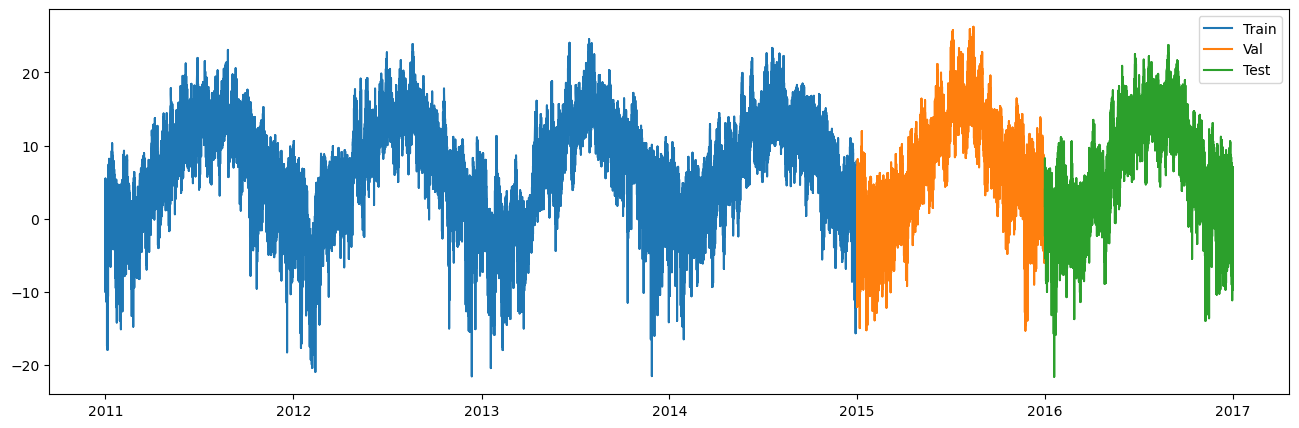

In [17]:
fig,ax=plt.subplots(figsize=(16,5))
ax.plot(X_train, label="Train")
ax.plot(X_valid, label="Val")
ax.plot(X_test, label='Test')
plt.legend()


In [11]:
X_train.shape, X_valid.shape

((728008, 1), (180849, 1))

In [ ]:
# Normallización de los datos importo esta libreria para realizar la transformación y despues volver a os datos odiginales tras realizar los respectivos calculos
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()